In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
from google.colab import drive
drive.mount('/content/drive')  #/My Drive/Colab Notebooks/

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A_Z Handwritten Data.csv")

In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]

In [7]:
print(x.shape)

(372450, 784)


In [8]:
print(y.shape)

(372450, 1)


In [9]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.columns = list(range(785))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


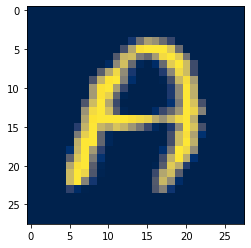

In [11]:
pixel = np.array(data.loc[1])
plt.imshow(pixel[1:].reshape((28,28)),cmap ='cividis')

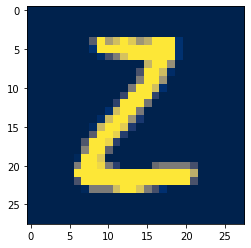

In [12]:
pixel = np.array(data.loc[368111])
plt.imshow(pixel[1:].reshape((28,28)),cmap ='cividis')

In [13]:
class Gaussian:
    
   
    def fit(self, X, y,smoothing = 10e-2):
      n_samples, n_features = X.shape
      self.classes = np.unique(y)              
      n_classes = len(self.classes)            

      # mean, variance matrix and ndarray for priors.
      self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
      self.var = np.zeros((n_classes, n_features), dtype=np.float64)
      self.priors =  np.zeros(n_classes, dtype=np.float64)
      
      #Calulating mean ,variance and prioors for each class. 
      for idx, c in enumerate(self.classes):
        temp = X[y==c]
        self.mean[idx, :] = temp.mean(axis=0)
        self.var[idx, :] = temp.var(axis=0) + smoothing
        self.priors[idx] = temp.shape[0] / float(n_samples)

    
   
    def predict(self, X):
      #start = time.time() 
      y_pred = [self.helper_predict(x) for x in X]
     # end = time.time()
      #print("Gaussian model takes ", "%.2f"%float(end - start), "sec to predict.")
      return np.array(y_pred)
    
    def helper_predict(self, x):
      posteriors = []

      # posterior probability for each class
      for idx, c in enumerate(self.classes):
        prior = np.log(self.priors[idx])
        posterior = np.sum(np.log(self.pdf(idx, x)))
        posterior = prior + posterior
        posteriors.append(posterior)
            
      # return class with highest posterior probability
      return self.classes[np.argmax(posteriors)]
            
    def pdf(self, class_idx, x):
      mean = self.mean[class_idx]
      var = self.var[class_idx]
      numerator = np.exp(- (x-mean)**2 / (2 * var**2))
      denominator = np.sqrt(2 * np.pi * var**2) 
      p_density = numerator / denominator 
      return p_density

In [14]:
def prep_data(X_train,Y_train,X_test,Y_test):
  
  #Resetting the indices of test and train data
  
  X_test.reset_index(inplace=True)
  X_test.drop(columns='index',inplace=True)
  Y_test.reset_index(drop=True,inplace=True)
  
  X_train.reset_index(inplace=True)
  X_train.drop(columns='index',inplace=True)
  Y_train.reset_index(drop=True,inplace=True)

  #Normalisation of test and train data
  X_test = X_test / 255.0 
  X_train = X_train / 255.0

  #Storing train and test data  to ndarray .
  X_train = X_train.to_numpy()
  Y_train = Y_train.to_numpy()
  X_test = X_test.to_numpy()
  Y_test = Y_test.to_numpy()

  return X_train,Y_train,X_test,Y_test

In [15]:
def train_test_split(data, train_per):
    
    #Shuffling the data 
    data = data.sample(frac=1,random_state=1)
    
    # test set and train set 
    train, test = np.split(data,[int(train_per * len(data))])
    
    #Spliting fetures and labels
    X_test, Y_test = test.drop(0,axis ='columns'), test[0]
    X_train, Y_train = train.drop(0,axis ='columns'), train[0]
    
    return X_train,X_test,Y_train,Y_test

In [16]:
def accurecy(Y_test, Y_pred):
  accurecy = np.sum(Y_test == Y_pred) / len(Y_test)
  return accurecy

In [17]:
def display_confusion(Y_pred,y_test):
  #Building confusion matrix
  confusion_matrix = pd.crosstab(Y_pred,Y_test)
  confusion_matrix.to_numpy()

  #labels
  labels =[ chr(i) for i in range(90,90)]
  
  #histogram of confusion matrix using seaborn
  fig, ax = plt.subplots(figsize=(10,10))  
  sns.heatmap(confusion_matrix, annot =True,fmt=".0f" ,cmap= 'BuGn',xticklabels=labels,yticklabels=labels)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(data,0.9)

In [19]:
X_train,Y_train,X_test,Y_test = prep_data(X_train,Y_train,X_test,Y_test)

accurecy is 71.6472009665727 %


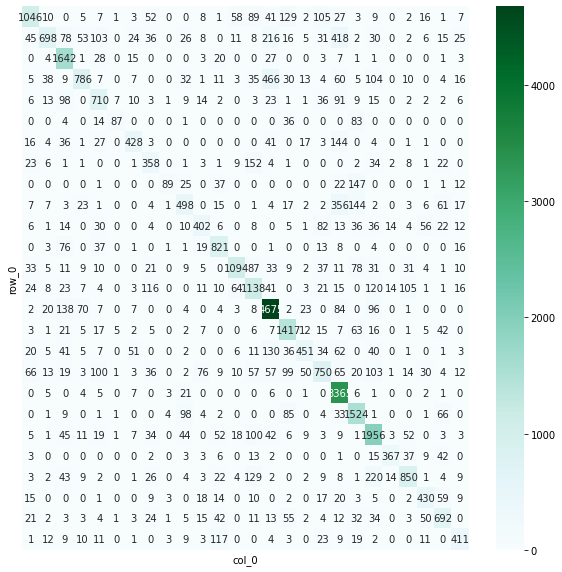

In [20]:
#Data is trained and tested using  Gaussian Naive Bayes model coded from scratch
model = Gaussian()
model.fit(X_train,Y_train)  #here smoothing constant is default ie : 10e-2
Y_pred = model.predict(X_test)
display_confusion(Y_pred, Y_test)
print("accurecy is",accurecy(Y_test,Y_pred)*100, "%")

predicted character is:  O


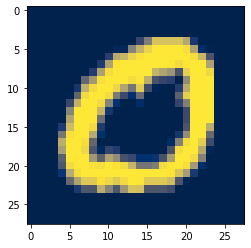

In [91]:
#
loc = 440 #{range of loc 0 to 37244}
Y= model.predict([X_test[loc]])
pixel = np.array(X_test[loc])

plt.imshow(pixel[0:].reshape((28,28)),cmap ='cividis')

print("predicted character is: ",chr(Y+65))